In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from jupyterthemes import jtplot
plt.style.use('mike') 
jtplot.style(context='notebook', fscale=1, grid=False)

import cosmogrb

You do not have threeML installed


/Users/jburgess/.environs/cosmogrb/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# GRBs

This section describes how to handle the low level simulation of GRBs. AS the code currently is built for simulating GRBs as observed by Fermi-GBM, we will focus our attention there. As the code expands, I will update the docs. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/1/1f/Fermi_telescope_illustration_01.jpg)


## Instantiate the GRB with its parameters

For this example, we will create a GRB that has its flux coming from a single pulse shape that is described by a cutoff power law evolving in time. 

$$  F_{h\nu}(t)  = K(t) \left(\frac{\nu}{\nu_0(t)} \right)^{-\alpha} \cdot \exp\left(- \frac{\nu}{\nu_0(t)} \right)$$



In [4]:
grb = cosmogrb.gbm.GBMGRB_CPL(
    ra=312.0,
    dec=-62.0,
    z=1.0,
    peak_flux=5e-7,
    alpha=-0.66,
    ep=500.0,
    tau=2.0,
    trise=1.0,
    tdecay=1.,
    duration=80.0,
    T0=0.1,
)

grb.info()

,0
name,SynthGRB
z,1
ra,312
dec,-62
duration,80
T0,0.1


,0
peak_flux,5.000000e-07
trise,1.000000e+00
tdecay,1.000000e+00
ep_tau,2.000000e+00
alpha,-6.600000e-01
ep_start,5.000000e+02


,0


## Examine the latent lightcurve

<IPython.core.display.Javascript object>


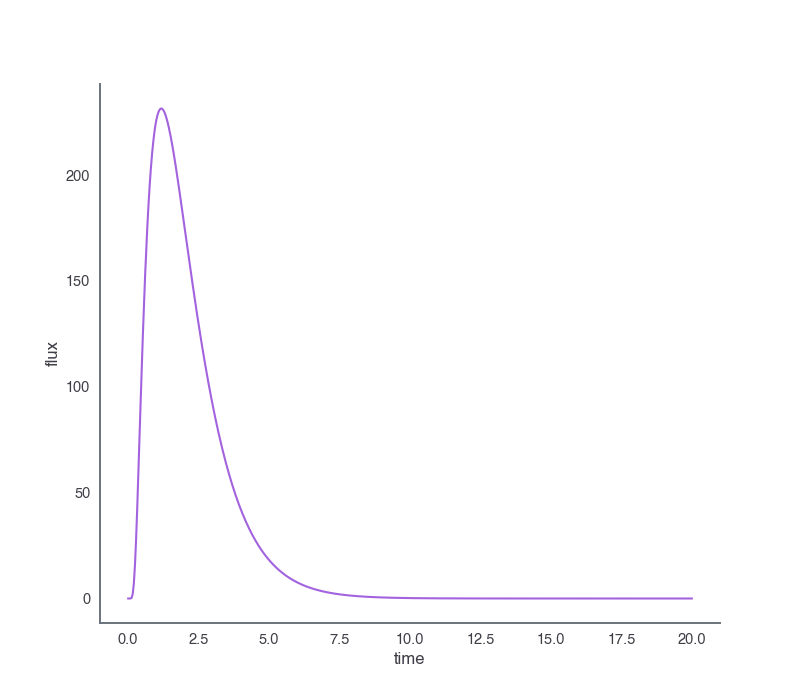

In [24]:
time = np.linspace(0, 20, 500)

grb.display_energy_integrated_light_curve(time, color="#A363DE");



<IPython.core.display.Javascript object>


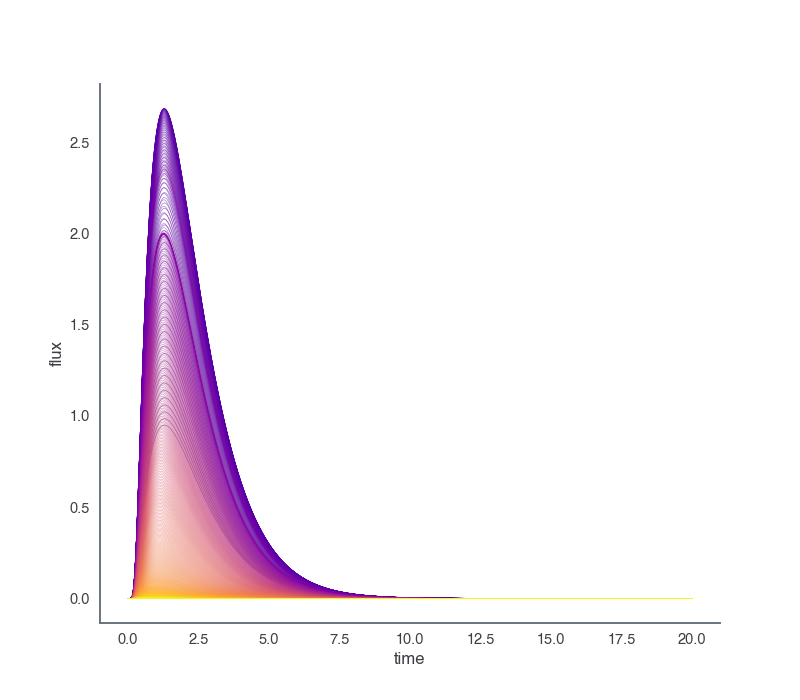

In [6]:
energy = np.logspace(1, 3, 500)

grb.display_energy_dependent_light_curve(time, energy, cmap='plasma', lw=.5, alpha=.5)

## Simulate the GRB 
Now we can create all the light curves from the GRB. Since are not currently running a Dask server, we tell the GRB to process serially, i.e., computing each light curve one at a time.

In [7]:
grb.go(serial=True)

## Save the GRB to an HDF5 file

As this is a time-consuming operation, we want to be able to save the GRB to disk. This is done by serializing all the light curves and information about the GRB into an HDF5 file.

In [9]:
grb.save('test_grb.h5')

## Reload the GRB

What if want to reload the GRB? We need to create and instance of **GRBSave** from the file we just created. Notice all the information about the GRB is recovered.

In [2]:
grb_reload = cosmogrb.GRBSave.from_file('test_grb.h5')
grb_reload.info()

,0
name,SynthGRB
z,1
ra,312
dec,-62
duration,80
T0,0.1


,0
alpha,-6.600000e-01
ep_start,5.000000e+02
ep_tau,2.000000e+00
peak_flux,5.000000e-07
tdecay,1.000000e+00
trise,1.000000e+00


### The GRBSave contents
The stores all the information about the light curves and the instrument responses used to generate the data. Each light curve/ response pair can be accessed as keys of the **GRBSave**. Then one can easily, examine/plot/process the contents of each light curve.


In [4]:
for key in grb_reload.keys:
    
    lightcurve = grb_reload[key]['lightcurve']
    lightcurve.info()

,0
name,b0
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,202250
n_counts_source,209
n_counts_background,202100


,0
angle,60.05306


,0
name,b1
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,194633
n_counts_source,16
n_counts_background,194645


,0
angle,119.94694


,0
name,n0
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,197147
n_counts_source,567
n_counts_background,196618


,0
angle,25.058493


,0
name,n1
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,197567
n_counts_source,590
n_counts_background,197049


,0
angle,0.541672


,0
name,n2
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,197144
n_counts_source,413
n_counts_background,196786


,0
angle,45.987813


,0
name,n3
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,204017
n_counts_source,318
n_counts_background,203749


,0
angle,60.997816


,0
name,n4
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,199499
n_counts_source,90
n_counts_background,199439


,0
angle,99.13828


,0
name,n5
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,198053
n_counts_source,367
n_counts_background,197724


,0
angle,58.08787


,0
name,n6
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,202403
n_counts_source,6
n_counts_background,202418


,0
angle,66.066868


,0
name,n7
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,199223
n_counts_source,3
n_counts_background,199256


,0
angle,91.81294


,0
name,n8
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,195089
n_counts_source,8
n_counts_background,195119


,0
angle,134.562439


,0
name,n9
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,207748
n_counts_source,248
n_counts_background,207530


,0
angle,60.376389


,0
name,na
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,201349
n_counts_source,24
n_counts_background,201355


,0
angle,81.759786


,0
name,nb
tstart,-100
tstop,300
time adjustment,5.76202e+08
T0,0.1
n_counts,206700
n_counts_source,23
n_counts_background,206743


,0
angle,122.372106


For example, let's look at the total, source, and background data light curves generated.

<IPython.core.display.Javascript object>


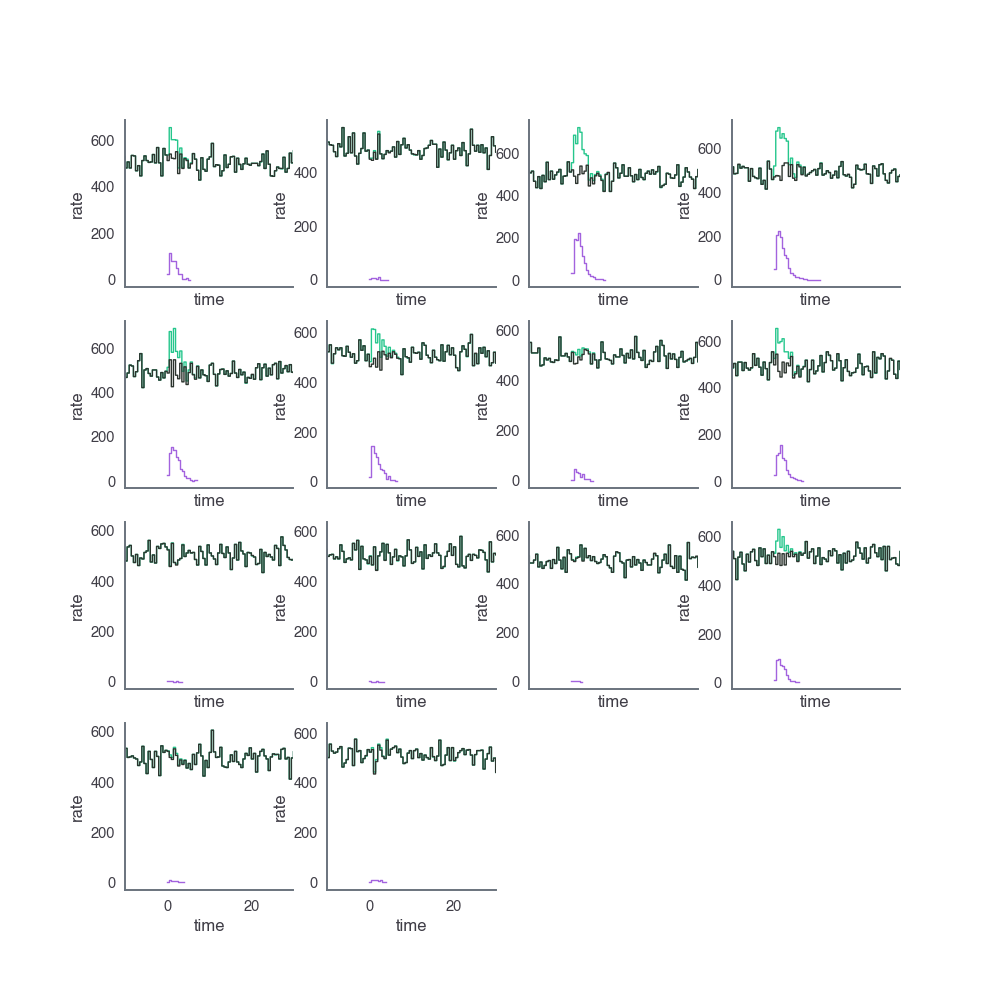

In [22]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=False,figsize=(10,10))
row=0
col = 0
for key in grb_reload.keys:
    ax = axes[row][col]
    
    lightcurve = grb_reload[key]['lightcurve']
    
    lightcurve.display_lightcurve(dt=.5, ax=ax,lw=1,color='#25C68C')
    lightcurve.display_source(dt=.5,ax=ax,lw=1,color="#A363DE")
    lightcurve.display_background(dt=.5,ax=ax,lw=1, color="#2C342E")
    ax.set_xlim(-10, 30)
    
    
    
    if col < 3:
        col+=1
    else:
        row+=1
        col=0

axes[3,2].set_visible(False)  
axes[3,3].set_visible(False)      

And we can look at the generated count spectra/

<IPython.core.display.Javascript object>


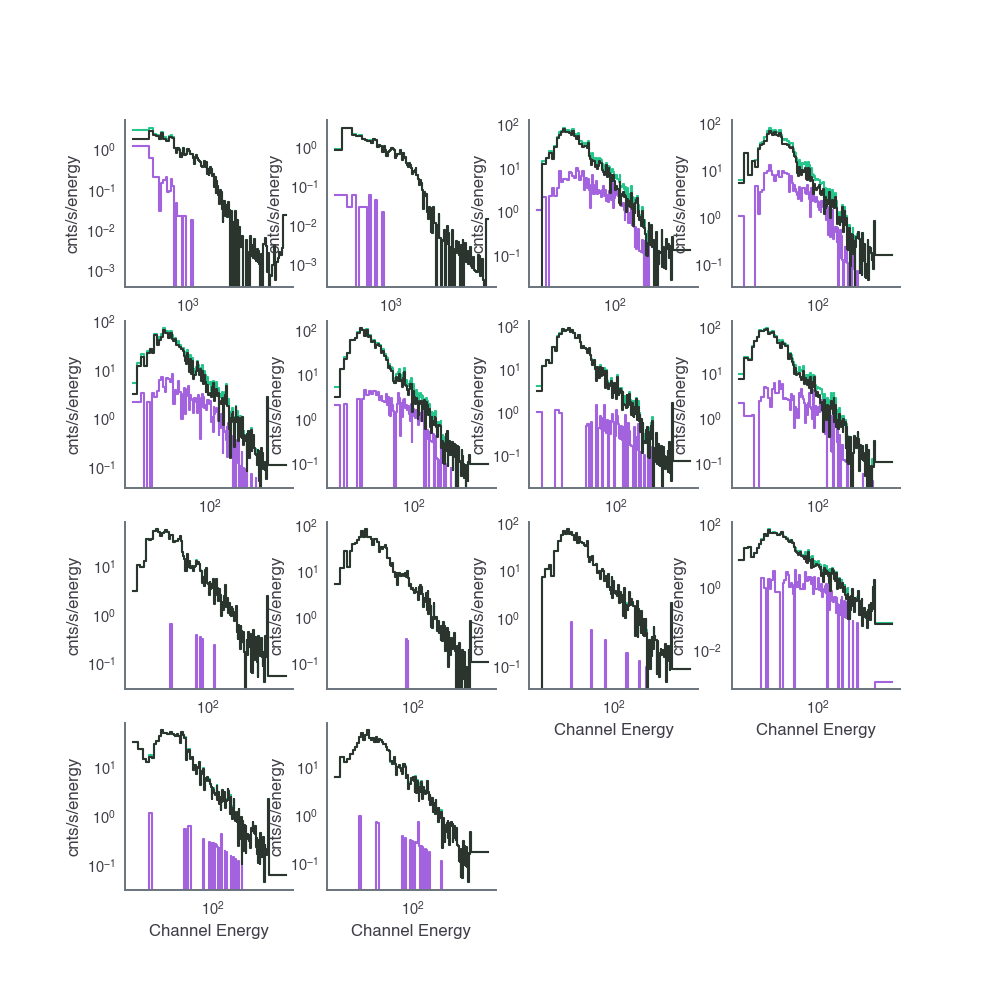

In [23]:
fig, axes = plt.subplots(4,4,sharex=False,sharey=False,figsize=(10,10))
row=0
col = 0

for key in grb_reload.keys:
    ax = axes[row][col]
    
    lightcurve = grb_reload[key]['lightcurve']
    
    lightcurve.display_count_spectrum(tmin=0, tmax=5, ax=ax,color='#25C68C')
    lightcurve.display_count_spectrum_source(tmin=0, tmax=5, ax=ax,color="#A363DE")
    lightcurve.display_count_spectrum_background(tmin=0, tmax=5, ax=ax, color="#2C342E")

    if col < 3:
        col+=1
    else:
        row+=1
        col=0
        
axes[3,2].set_visible(False)  
axes[3,3].set_visible(False)      

## Convert HDF5 to standard FITS files

In the case of GBM, we can convert the saved HDF5 files into TTE files for analysis in 3ML.

In [22]:
cosmogrb.grbsave_to_gbm_fits("test_grb.h5")
!ls SynthGRB_*

SynthGRB_b0.fits      SynthGRB_n3.fits      SynthGRB_n7rsp_n7.rsp
SynthGRB_b0.rsp       SynthGRB_n3.rsp       SynthGRB_n8.fits
SynthGRB_b0rsp_b0.rsp SynthGRB_n3rsp_n3.rsp SynthGRB_n8.rsp
SynthGRB_b1.rsp       SynthGRB_n4.fits      SynthGRB_n8rsp_n8.rsp
SynthGRB_b1rsp_b1.rsp SynthGRB_n4.rsp       SynthGRB_n9.fits
SynthGRB_n0.fits      SynthGRB_n4rsp_n4.rsp SynthGRB_n9.rsp
SynthGRB_n0.rsp       SynthGRB_n5.fits      SynthGRB_n9rsp_n9.rsp
SynthGRB_n0rsp_n0.rsp SynthGRB_n5.rsp       SynthGRB_na.fits
SynthGRB_n1.fits      SynthGRB_n5rsp_n5.rsp SynthGRB_na.rsp
SynthGRB_n1.rsp       SynthGRB_n6.fits      SynthGRB_narsp_na.rsp
SynthGRB_n1rsp_n1.rsp SynthGRB_n6.rsp       SynthGRB_nb.fits
SynthGRB_n2.fits      SynthGRB_n6rsp_n6.rsp SynthGRB_nb.rsp
SynthGRB_n2.rsp       SynthGRB_n7.fits      SynthGRB_nbrsp_nb.rsp
SynthGRB_n2rsp_n2.rsp SynthGRB_n7.rsp
